In [3]:
import sys
import os
import platform
import importlib
import glob
import netCDF4

import numpy as np
import pandas as pd
import datetime

# Set fundamental paths
base_FP = '/home/work/intern'
data_FP = '/home/work/intern/DATASETS'
sys.path.append(base_FP + '/PYTHON_MODULES')
print(base_FP, data_FP)

#hydroAI libs
import HydroAI.ERA5_land as hERA5_land
import HydroAI.Grid as hGrid
import HydroAI.Plot as hPlot
import HydroAI.Data as hData
importlib.reload(hERA5_land);
importlib.reload(hPlot);
importlib.reload(hData);

# Ignore runtime warnings
import warnings
warnings.filterwarnings("ignore")

/home/work/intern /home/work/intern/DATASETS


In [ ]:
year = 2023
nc_file = f'{data_FP}/GLDAS_Noah_{year}_R_eqd_050.nc'

with netCDF4.Dataset(nc_file) as nc:
    print(nc.variables.keys())
    nc_lat = nc.variables['latitude'][:].data
    nc_lon = nc.variables['longitude'][:].data
    SM = nc.variables['SoilMoi0_10cm_inst'][:].data / 100 # kg/m2 -> m3/m3
    ET = nc.variables['ET'][:].data # kg/m2s

# Check the shape of the data
print(nc_lat.shape)
print(nc_lon.shape)
print(SM.shape) # (lat, lon, time)
print(ET.shape) # (lat, lon, time)

dict_keys(['latitude', 'longitude', 'SoilMoi0_10cm_inst', 'ET'])
(360, 720)
(360, 720)
(360, 720, 365)
(360, 720, 365)


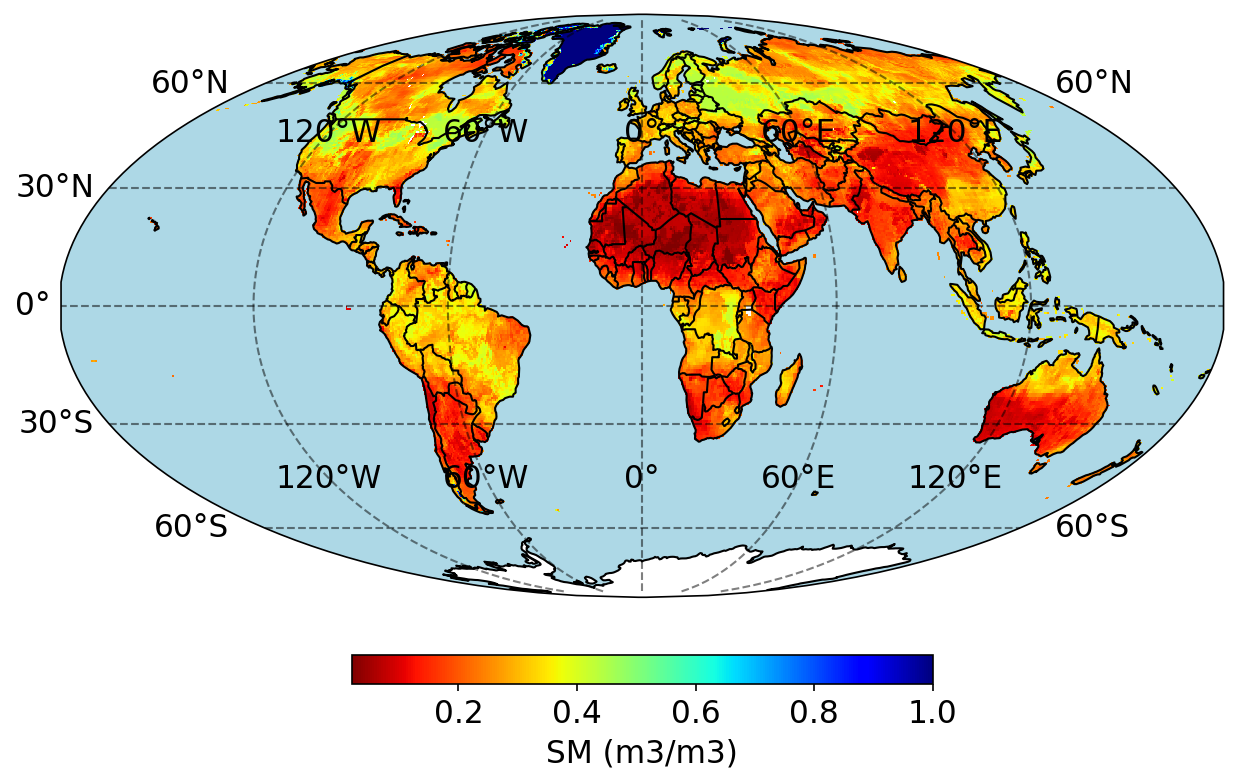

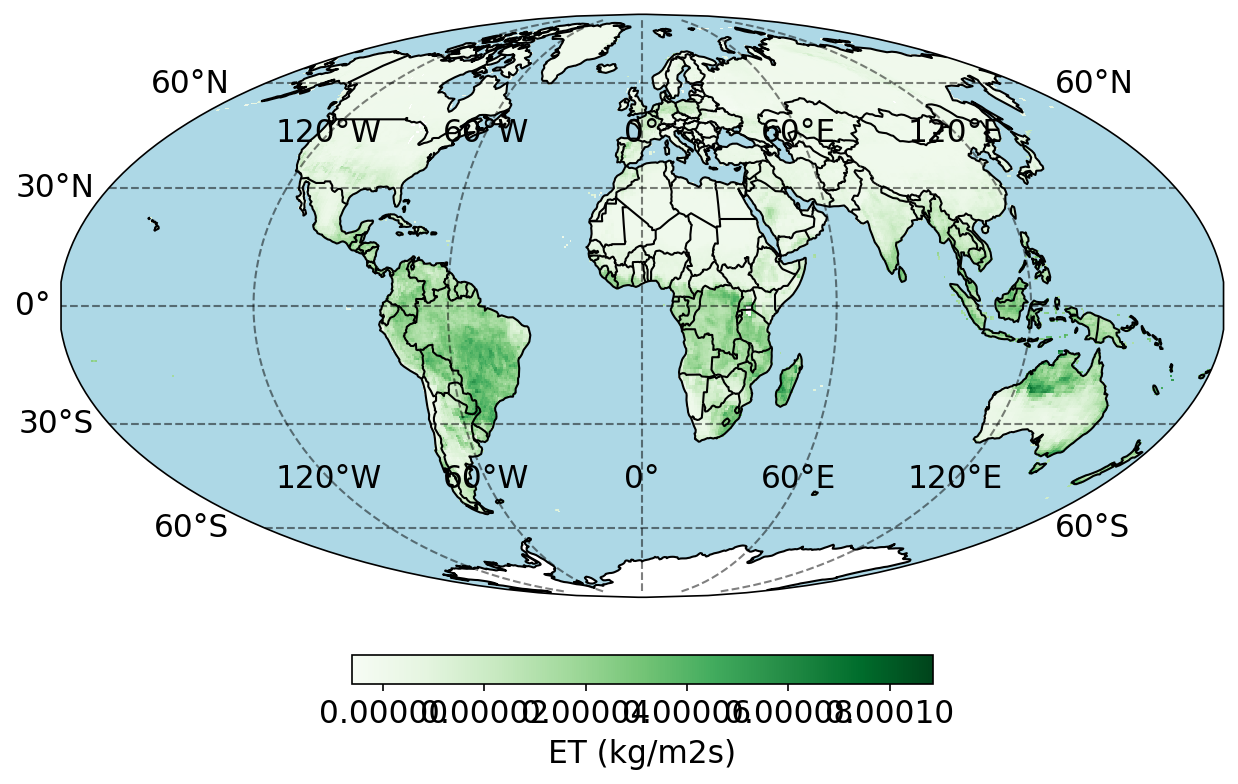

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [11]:
time_idx = 0
target = SM[:, :, time_idx]
hPlot.plot_map(nc_lon, nc_lat, target, np.nanmin(target), np.nanmax(target), plot_title=f'GLDAS_Noah SM (0-10cm)', label_title='SM (m3/m3)', cmap='jet_r')

time_idx = 0
target = ET[:, :, time_idx]
hPlot.plot_map(nc_lon, nc_lat, target, np.nanmin(target), np.nanmax(target), plot_title=f'GLDAS_Noah ET', label_title='ET (kg/m2s)', cmap='Greens')

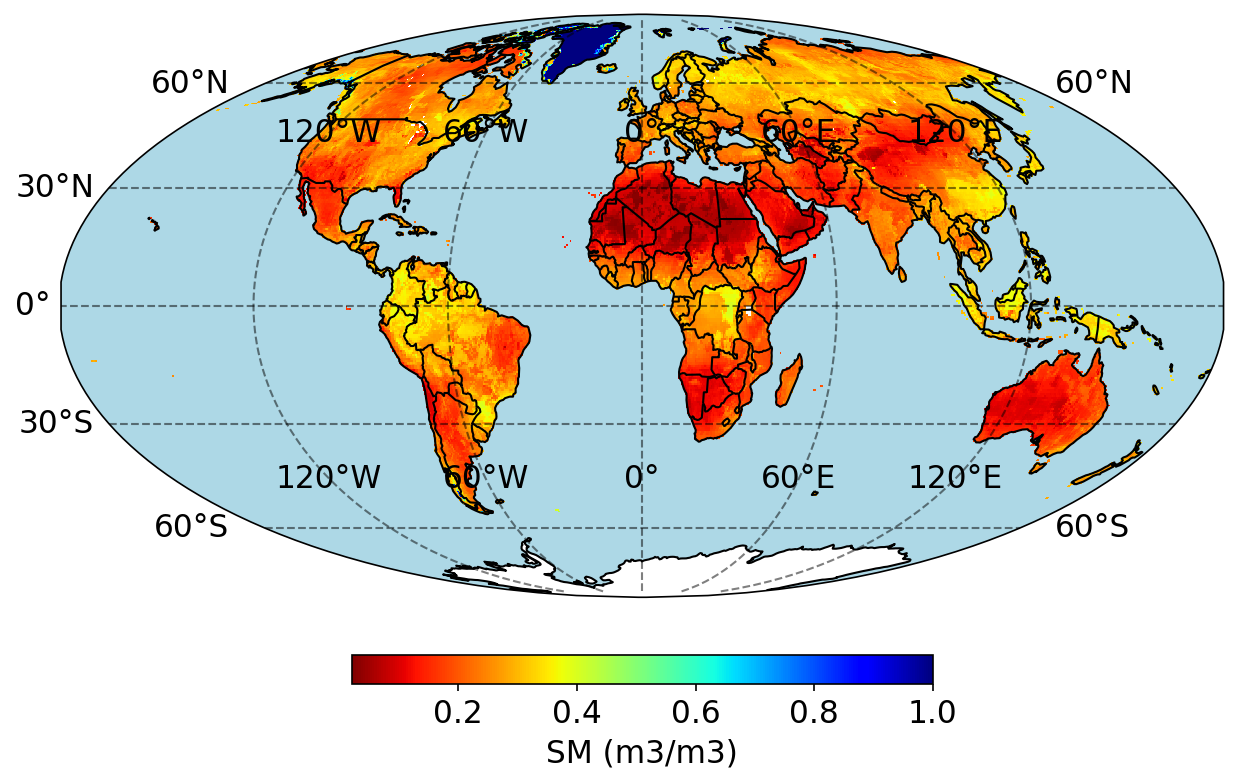

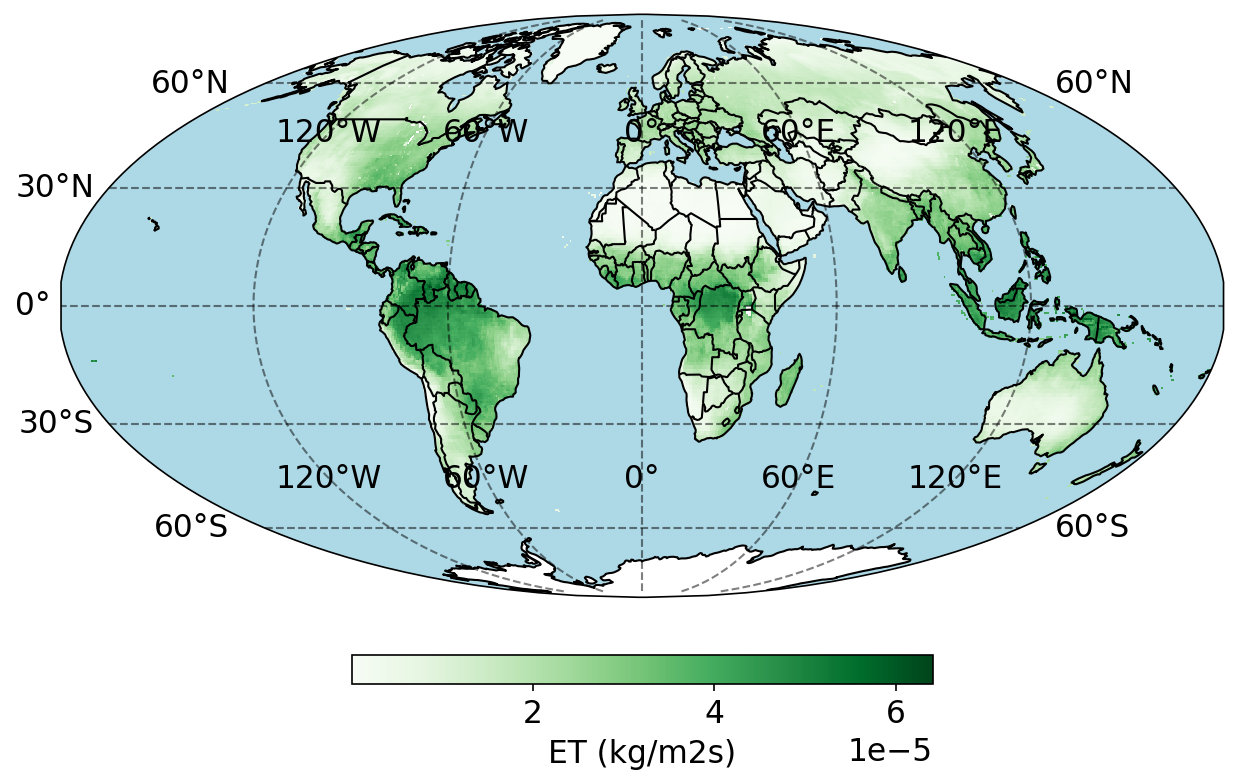

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [12]:
# Temporal average
target = np.nanmean(SM, axis=2)
hPlot.plot_map(nc_lon, nc_lat, target, np.nanmin(target), np.nanmax(target), plot_title=f'GLDAS_Noah SM (0-10cm)', label_title='SM (m3/m3)', cmap='jet_r')

target = np.nanmean(ET, axis=2)
hPlot.plot_map(nc_lon, nc_lat, target, np.nanmin(target), np.nanmax(target), plot_title=f'GLDAS_Noah ET', label_title='ET (kg/m2s)', cmap='Greens')